In [8]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import load_boston
boston_data=load_boston()
df=pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
X=df[['LSTAT']].values
Y=boston_data.target

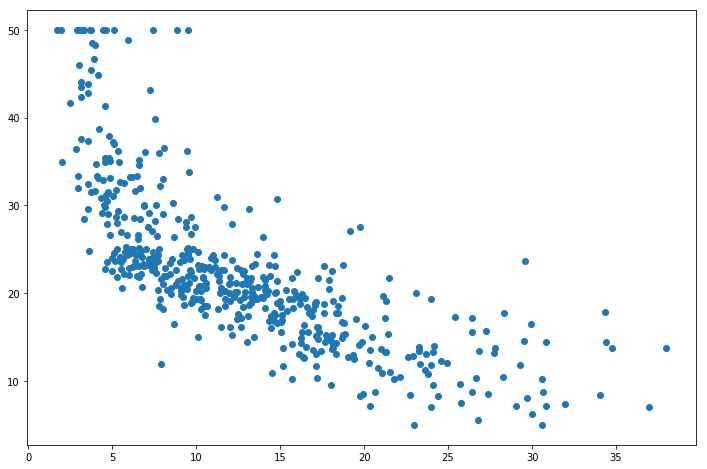

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(X,Y)

# For other info visit resources

# preprocessing types:
1.Standardlization/Mean Removal
2.Min-Max or scaling to range
3.Normalization
4.Binarization

In [16]:
from sklearn import preprocessing
X_train=np.array([[1.,-1.,2.],
                 [2.,0.,0.],
                 [0.,1.,-1.]])
X_train.mean(axis=0)

array([1.        , 0.        , 0.33333333])

# STANDARDLISATION/MEAN REMOVAL

In [17]:
X_scaled=preprocessing.scale(X_train)

In [18]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [19]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [20]:
X_scaled.std(axis=0)

array([1., 1., 1.])

# Preprocessing of test data is not done directly(done by transform)

In [22]:
scaler=preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [24]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [25]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [26]:
X_test=[[-1.,1.,0.]]

In [27]:
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

# Min-Max OR Scaling to range

In [31]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
min_max_scaler=preprocessing.MinMaxScaler()
X_train_minmax=min_max_scaler.fit_transform(X_train)

In [32]:
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [33]:
X_test = np.array([[-3., -1.,  0.], [2., 1.5, 4.]])
X_test_minmax=min_max_scaler.transform(X_test)


In [34]:
X_test_minmax

array([[-1.5       ,  0.        ,  0.33333333],
       [ 1.        ,  1.25      ,  1.66666667]])

# Maxabs scaler

In [35]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_abs=preprocessing.MaxAbsScaler()
X_abs_scaled=X_abs.fit_transform(X_train)

In [36]:
X_abs_scaled

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [37]:
X_test = np.array([[ -1., -0.5,  2.], [0., 0.5, -0.6]])
X_test_scaled=X_abs.transform(X_test)

In [39]:
X_test_scaled

array([[-0.5, -0.5,  1. ],
       [ 0. ,  0.5, -0.3]])

# scaling sparse data

# Scaling vs Whitening

# 3.Normalization

In [40]:
X= [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
nor=preprocessing.normalize(X,norm='l1')
nor

array([[ 0.25, -0.25,  0.5 ],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.5 , -0.5 ]])

In [41]:
nor2=preprocessing.normalize(X,norm='l2')
nor2

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

# 4.Binarization

In [42]:
X= [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binary=preprocessing.Binarizer().fit(X)
binary

Binarizer(copy=True, threshold=0.0)

In [45]:
binary.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [46]:
binary2=preprocessing.Binarizer(threshold=-0.5)
binary2.transform(X)

array([[1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 0.]])

# Encoding features

In [47]:
source=['India','Nepal','Pakistan','Syria']
encode=preprocessing.LabelEncoder()

In [48]:
encoded=encode.fit_transform(source)

In [49]:
encoded

array([0, 1, 2, 3], dtype=int64)

In [50]:
test_data=['Nepal','India','Pakistan','Syria']
test_encode=encode.transform(test_data)

In [52]:
test_encode

array([1, 0, 2, 3], dtype=int64)